# Import the Rquired Libraries

In [1]:
import pandas as pd #Import Panda Library
import numpy as np# Import Numpy Library
import seaborn as sns # Import Seaborn
sns.set_theme()
import matplotlib.pyplot as plt # Import Matplotlib
import scipy as stats
from scipy.stats import pearsonr
import sklearn

# Importing the Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header = None, na_values = '?')
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Data Preprocessing(Data Cleaning, Data Formatting)

In [3]:
headers = ["Symboling","Normalized_losses","Make","Fuel_Type","aspiration","num_of_doors","Body_style","drive_wheels","Engine_location","Wheel_base","length","Width","Height","Curb_Weight","Engine_type","num_of_cylinders","engine_size","fuel_system","Bore","Stroke","Compression_ratio","Horsepower","Peak_rpm","City_mpg","Highway_mpg","Price"]
df.columns = headers
df.head()
                    # Adding Header of each and every columns

,Symboling,Normalized_losses,Make,Fuel_Type,aspiration,num_of_doors,Body_style,drive_wheels,Engine_location,Wheel_base,...,engine_size,fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
# Export the Data set as CSV File
path = "/Users/gaurangbhimani/Desktop/Data_Material/Data_Analysis_Python/Automobile.csv"
df.to_csv(path)    

In [5]:
df.dtypes             # To Check Data Types

Symboling              int64
Normalized_losses    float64
Make                  object
Fuel_Type             object
aspiration            object
num_of_doors          object
Body_style            object
drive_wheels          object
Engine_location       object
Wheel_base           float64
length               float64
Width                float64
Height               float64
Curb_Weight            int64
Engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
Bore                 float64
Stroke               float64
Compression_ratio    float64
Horsepower           float64
Peak_rpm             float64
City_mpg               int64
Highway_mpg            int64
Price                float64
dtype: object

In [6]:
df.describe() # Check the Statistical summary of each column to learn about the distribution of data in each column

,Symboling,Normalized_losses,Wheel_base,length,Width,Height,Curb_Weight,engine_size,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.describe(include = "all")  # Outcome shows the summary of all the Columns

,Symboling,Normalized_losses,Make,Fuel_Type,aspiration,num_of_doors,Body_style,drive_wheels,Engine_location,Wheel_base,...,engine_size,fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [8]:
df.info() # Provide a concis summary of Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalized_losses  164 non-null    float64
 2   Make               205 non-null    object 
 3   Fuel_Type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   Body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   Engine_location    205 non-null    object 
 9   Wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Height             205 non-null    float64
 13  Curb_Weight        205 non-null    int64  
 14  Engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [9]:
df.dropna (subset = "Price", axis=0, inplace = True ) # Drop the missing values in Python
df.head(25)    # Drop row or column by changing index with NaN Value

,Symboling,Normalized_losses,Make,Fuel_Type,aspiration,num_of_doors,Body_style,drive_wheels,Engine_location,Wheel_base,...,engine_size,fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0


In [10]:
mean = df ["Normalized_losses"].mean()
df["Normalized_losses"].replace(np.nan,mean,inplace = True)
df

,Symboling,Normalized_losses,Make,Fuel_Type,aspiration,num_of_doors,Body_style,drive_wheels,Engine_location,Wheel_base,...,engine_size,fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Data Formatting


In [11]:
df["City_mpg"] = 235 / df["City_mpg"]   # mpg : miles per gallon for fuel consumption
df.rename (columns = {"City_mpg" : "City_L/100km"}, inplace = True) # Applying calculations to an entire column
df

,Symboling,Normalized_losses,Make,Fuel_Type,aspiration,num_of_doors,Body_style,drive_wheels,Engine_location,Wheel_base,...,engine_size,fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_L/100km,Highway_mpg,Price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,10.217391,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,12.368421,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,13.055556,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,9.038462,27,22470.0


In [12]:
df["Price"] = df["Price"].astype("int") # Chaging the Data type of "Price" Dataframe from Float to Int


# Data Normalization

In [13]:
df["Price"].min()

5118

In [14]:
df["Price"].max()

45400

# Binning in Python Pandas

In [15]:
bins = np.linspace(min(df["Price"]),max(df["Price"]),4)   # Low : 5K TO 12K , MEDIUM : 12K TO 31K ,HIGH : 31K TO 45K
group_names = ["Low","Medium","High"]              # SO We need 4 Numbers as Divider
df["price_binned"]= pd.cut(df["Price"],bins,labels = group_names, include_lowest = True)
df.head(50)

,Symboling,Normalized_losses,Make,Fuel_Type,aspiration,num_of_doors,Body_style,drive_wheels,Engine_location,Wheel_base,...,fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_L/100km,Highway_mpg,Price,price_binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,11.190476,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,11.190476,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000.0,12.368421,26,16500,Low
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500.0,9.791667,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500.0,13.055556,22,17450,Low
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,12.368421,25,15250,Low
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,12.368421,25,17710,Low
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,12.368421,25,18920,Medium
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500.0,13.823529,20,23875,Medium
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800.0,10.217391,29,16430,Low



# Exploratory Data Analysis : To summarize main characterstics of the data for better understanding of Data Set

In [16]:
drive_wheels_counts = df["drive_wheels"].value_counts().to_frame() # Use value_counts() Method and. result to a Data Frame
drive_wheels_counts.rename(columns = {'drive_wheels' :'value_counts'}, inplace = True)
drive_wheels_counts


,count
drive_wheels,
fwd,118
rwd,75
4wd,8


# Box Plot : Upper and Lower exterme, Upper and Lower Quartile, Median and Whisker

<Axes: xlabel='drive_wheels', ylabel='Price'>

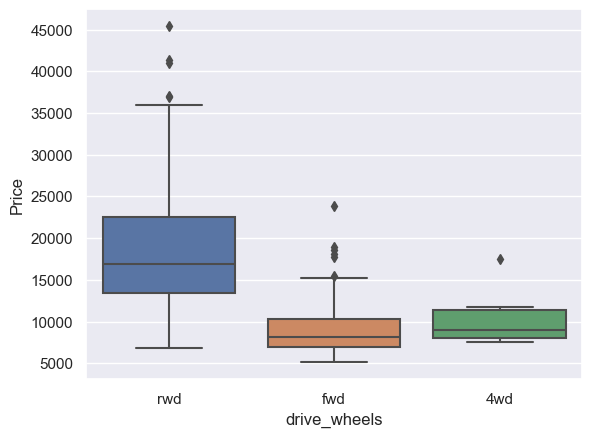

In [17]:
sns.boxplot(x = "drive_wheels", y = "Price",data = df)

# Scatter Plot: Independent Variable( X axis), Dependent Variable(Y Axis)

Text(0, 0.5, 'Price')

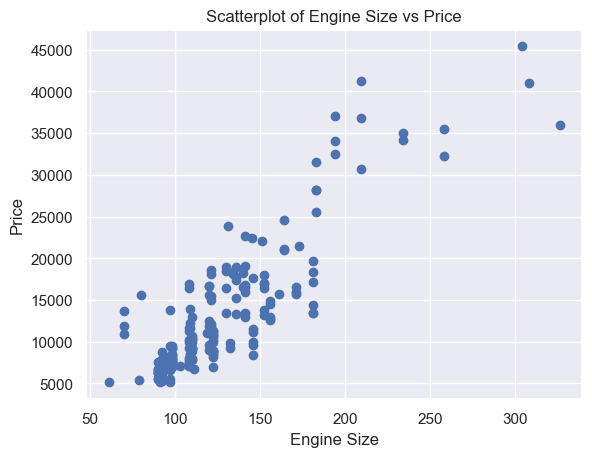

In [18]:
x = df["engine_size"]
y = df["Price"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

# Grouping Data : Problem : Find out avreage price of Vehicles and how they differ with diffrent body style

In [19]:
df_test = df[['drive_wheels','Body_style','Price']]
df_grp = df_test.groupby(['drive_wheels','Body_style'],as_index = False).mean()
df_grp.sort_values(by='Price',ascending= True)


,drive_wheels,Body_style,Price
0,4wd,hatchback,7603.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
2,4wd,wagon,9095.750000
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
3,fwd,convertible,11595.000000
1,4wd,sedan,12647.333333
10,rwd,hatchback,14337.777778
12,rwd,wagon,16994.222222


# Pivot Table: Transforming Table to Pivot table 

In [20]:
df_pivot = df_grp.pivot( index = 'drive_wheels',columns ='Body_style')
df_pivot

Price                                            \
Body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
Body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<Axes: xlabel='None-Body_style', ylabel='drive_wheels'>

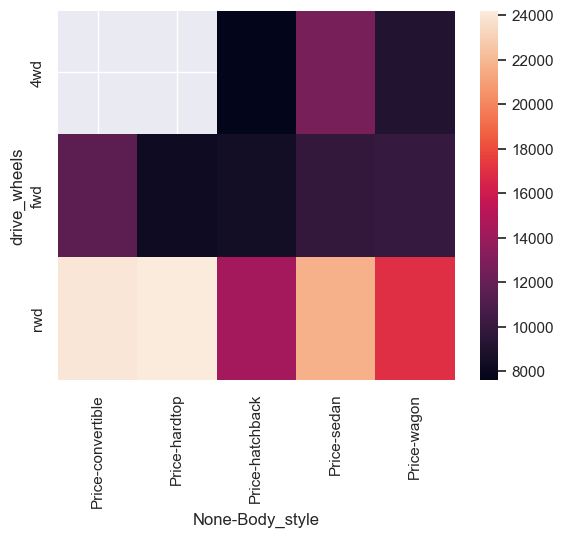

In [21]:
# Heat_Map : Plot the target variable over multiple variables
sns.heatmap(df_pivot)

# Correlation :  What extent different variables are interdependent

(0.0, 53627.048529448584)

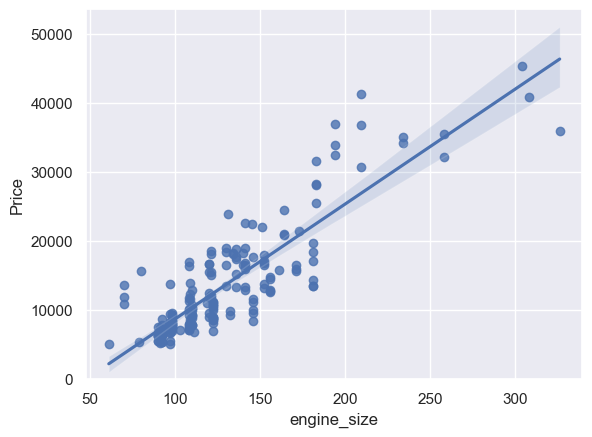

In [22]:
# Correlation between two features (engine:size and price) by Scatterplot 
sns.regplot(x = 'engine_size',y = 'Price',data = df) # Positive Linear Relationship
plt.ylim(0,)  # lowe limit of Y axis 0 to higher limit Unchanged

(0.0, 48169.403618319826)

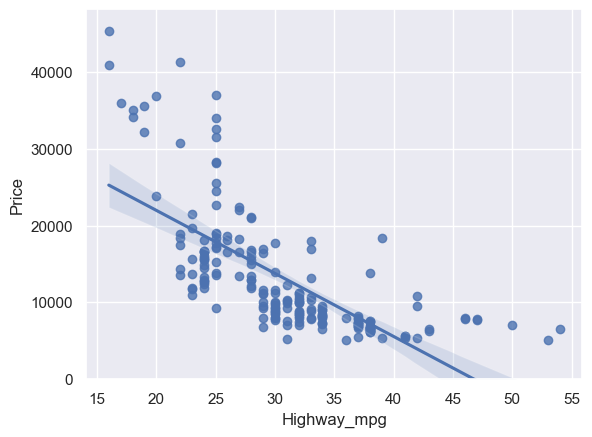

In [23]:
sns.regplot(x = 'Highway_mpg', y = 'Price', data = df) # Negative Linear Relationship
plt.ylim(0,)

(0.0, 47414.1)

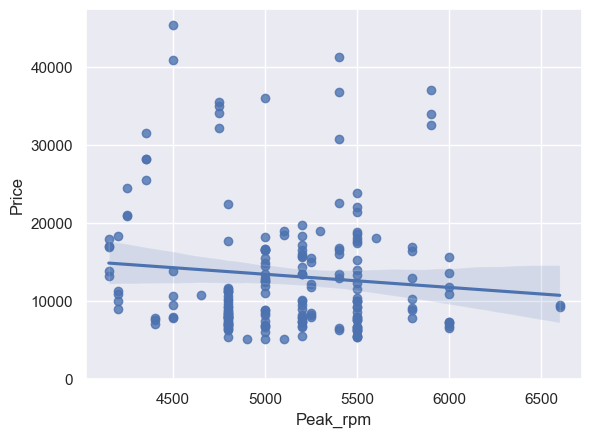

In [24]:
sns.regplot(x = 'Peak_rpm', y = 'Price', data = df) # Weak correlation
plt.ylim(0,)

# Pearson Correlation  

In [25]:
df.dropna (subset = "Horsepower", axis=0, inplace = True )
pearson_coef, p_value = pearsonr(df['Horsepower'],df['Price']) # +1 .. Large positive relation, -1... Large negative relation, 0.. NO relation
pearson_coef,p_value          # <0.001 Strong reliability , <0.05 Moderate, <0.1 weak, > 0.1 No reliablity

(0.8105330821322062, 1.1891278276945977e-47)

# Machine Learning Model Development : Used a mathematical equation to predict a value by given one or more other values

# Fitting a Simple Linear Regression   . Math euation = Y = b0 + b1*X

In [26]:
from sklearn.linear_model import LinearRegression # Import Linear_model from scikit-learn

In [27]:
lm = LinearRegression() # Create a linear regression object by using constructor

In [28]:
X = df [['Highway_mpg']]  # Define Predictor Variable
Y = df [['Price']]        # Define Target Variable

In [29]:
lm.fit(X,Y)  # lm.fit(X,Y) to fit the Model and find the Parameters b0 and b1
Yhat = lm.predict(X) # Obtain a Prediction

In [30]:
lm.intercept_    # find Intercept b0

array([38450.00418821])

In [31]:
lm.coef_         # find slope b1

array([[-821.50472215]])

In [32]:
# SLR Model is  Y = 38450.00 - (821.50 * X)

# Simple Linear Regression Model Evalution using Visualization

(0.0, 48158.63524483726)

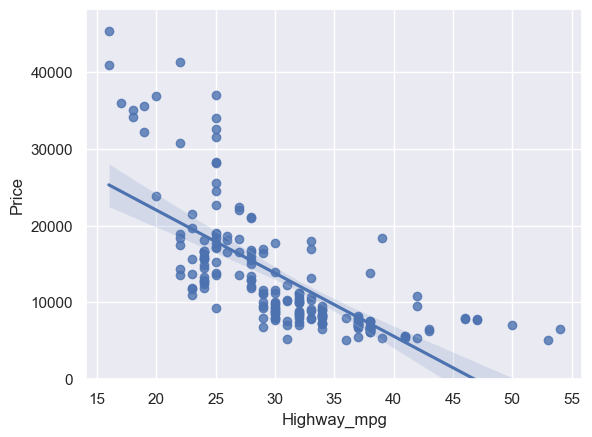

In [33]:
# Regression Plot
sns.regplot(x='Highway_mpg',y='Price',data= df)
plt.ylim(0,)  # point: actual value, regression line: predict value

<Axes: xlabel='Highway_mpg', ylabel='Price'>

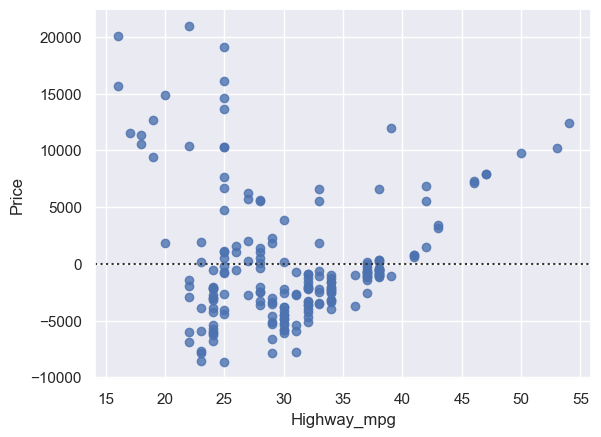

In [34]:
# Residual Plot: Giving an Eroor between actual and predictor Value equation y = b0 +b1x - e0

sns.residplot(x='Highway_mpg',y='Price',data= df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


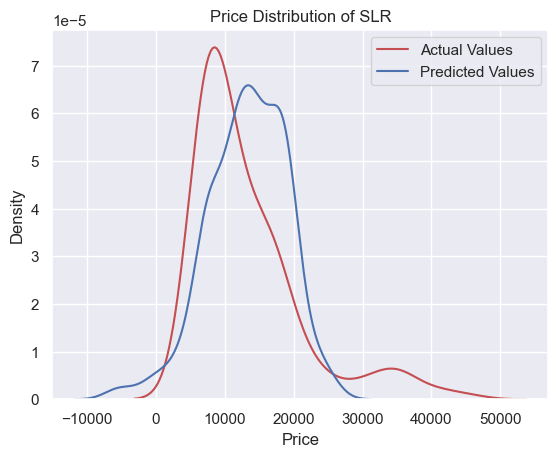

In [35]:
# Distribution plot for SLR . for future update of Seaborn we are using Kernal Density Estimate Plot
ax1 = sns.kdeplot(df['Price'], color = "r", label = 'Actual Values') # Plotting the actual value
sns.kdeplot(Yhat,  color = "b",label = "Predicted Values", ax= ax1 ) # Plotting the predicated value
ax1.set_title('Price Distribution of SLR')
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.legend()
plt.show()


# Multiple Linear Regression : y = b0 + b1x1 + b2x2 + b3x3 + b4x4

In [36]:
x = df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']]
lm.fit(x,Y)
Ythat=lm.predict(x)
lm.intercept_ 

array([-15700.57397904])

In [37]:
lm.coef_

array([[53.27878556,  4.66217408, 82.22948394, 35.5175845 ]])

In [38]:
#MLR equation is Y = -15700.53 + (53.2787)*(Horspower)+(4.662)*(Curbweight)+(82.2294)*(enginesize)+(35.51)*(Highwaympg)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


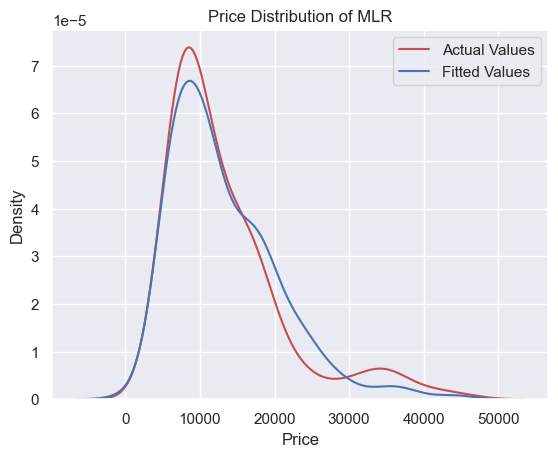

In [39]:
# Distribution plot for MLR 
ax1 = sns.kdeplot(df['Price'], color = "r", label = 'Actual Values')
sns.kdeplot(Ythat, color = "b",label = "Fitted Values", ax = ax1 )
ax1.set_title('Price Distribution of MLR')
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.legend()
plt.show()

# Model Selection by Multiple Linear Regression 

In [40]:
# Another Problem: In-sample evalution tells us how well our model will fit to our data used to train it.
# but it does not tell us how well the trained model can be used to predict new data
# Split data : Training Data (70%), Testing Data (30%)
# Build a train model with a Training data
# Use testing Data to assess the performance of a predictive model

In [41]:
from sklearn.model_selection import train_test_split
#x_train,x-test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state= 0)
x_train,x_test,y_train,y_test = train_test_split(df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']], df['Price'],test_size = 0.3,random_state = 0)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


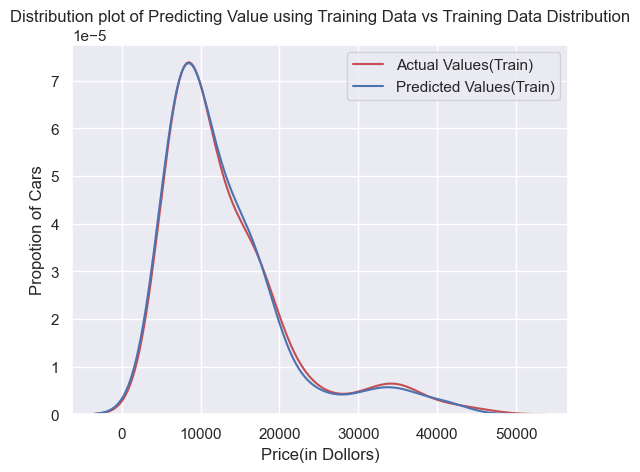

In [42]:
# Distribution plot of Predicting Value of Training Data and Actual Training Data

ax1 = sns.kdeplot(df['Price'], color = "r", label = 'Actual Values(Train)')
sns.kdeplot(y_train, color = "b",label = "Predicted Values(Train)", ax = ax1 )
ax1.set_title('Distribution plot of Predicting Value using Training Data vs Training Data Distribution')
ax1.set_xlabel('Price(in Dollors)')
ax1.set_ylabel('Propotion of Cars')
ax1.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


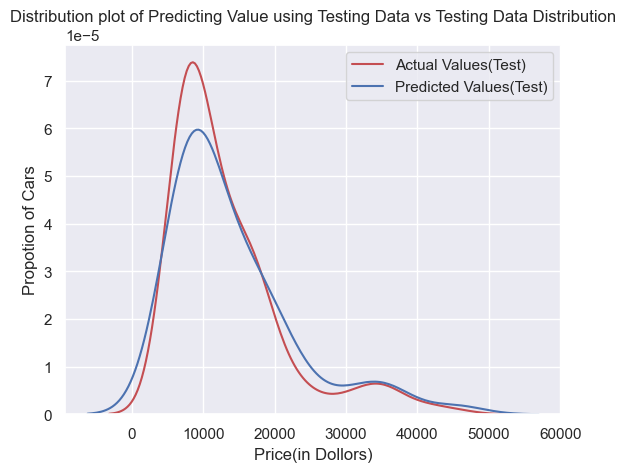

In [43]:
# Distribution plot of Predicting Value of Testing Data and Actual testing Data for Distribution

ax1 = sns.kdeplot(df['Price'], color = "r", label = 'Actual Values(Test)')
sns.kdeplot(y_test, color = "b",label = "Predicted Values(Test)", ax = ax1 )
ax1.set_title('Distribution plot of Predicting Value using Testing Data vs Testing Data Distribution')
ax1.set_xlabel('Price(in Dollors)')
ax1.set_ylabel('Propotion of Cars')
ax1.legend()
plt.show()

In [44]:
# Conclusion: We see the Distribution Data are similar to some extent for training Data.but..for same plot using the Testing
# Data are relatively Different.

#Problem 2:
# Using more data in Training determines that Performance of Model going up in real world but Quality of Model going down.
# Using less data in Training determines that Performance of Model going down and Quality of Model is good.
  
# To overcome this Problem, We are using Cross Validataion Method 

# Cross_Validation_Metthod

In [45]:
# Split Data in 4 different part, Then R^2 and get the final Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm,df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']],df['Price'],cv=4)
scores

array([0.8452864 , 0.80148603, 0.49067483, 0.45067348])

In [46]:
from sklearn.model_selection import cross_val_predict
out = cross_val_predict(lm,df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']],df['Price'],cv=4)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


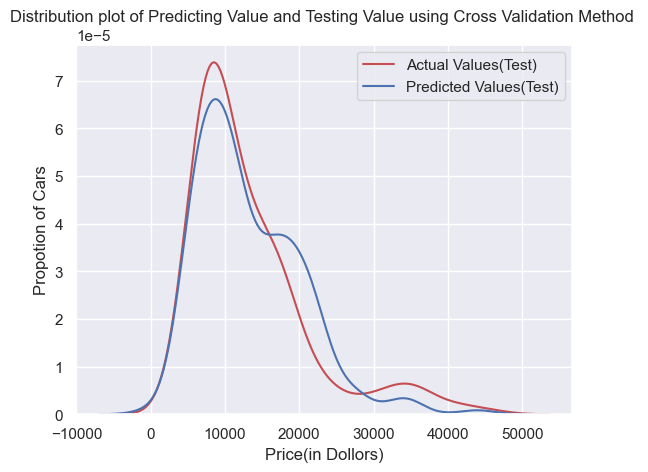

In [47]:
# Distribution plot of Predicting Value and Testing Value using Cross Validation Method

ax1 = sns.kdeplot(df['Price'], color = "r", label = 'Actual Values(Test)')
sns.kdeplot(out, color = "b",label = "Predicted Values(Test)", ax = ax1 )
ax1.set_title('Distribution plot of Predicting Value and Testing Value using Cross Validation Method ')
ax1.set_xlabel('Price(in Dollors)')
ax1.set_ylabel('Propotion of Cars')
ax1.legend()
plt.show()

# Evaluation :  how good the model fits on Dataset
# Metod 1:  Mean Squared Error (MSE)


In [48]:
# error = actual value - predicted value
# MSE = Mean square of error/ Number of Sample

In [49]:
from sklearn.metrics import mean_squared_error  # MSE for Simple Linear Regression
mean_squared_error(df['Price'],Yhat)  

31837842.499262147

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['Price'],Ythat)          # MSE for Multiple Linear Regression

11941505.191703444

# #Method 2: R-squared(R^2)

In [51]:
# Coefficient R^2 is determine how close the Data is to the fitted regression line
# R^2 is the percentage of variation of the target variable(Y) that explained by linear Model
# R^2 = (1- (MSE of regression line / MSE of the average of the Data))

In [52]:
from sklearn.metrics import r2_score
lm.fit(X,Y)     # X = Highway_mpg, Y = Price
lm.score(X,Y)

0.4973491560296689

In [53]:
# Decision Making: Determine a Good Model Fit

In [54]:
# Reason 1

# First We train the model
lm.fit(X,Y)
#Let's predict the price of a car with 30 highway-mpg
lm.predict(np.array(30.0).reshape(-1,1))


# Reason 1: Here the predicted price is 13804$ . that values make sense.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13804.86252368]])

In [55]:
# Reason 2 : In regression plot shows that the data trends down as the dependent variable increases the plot and aslo non linear behavior

# Reason 3 : MSE for MLR < MSE for SLR , since the error for the data will decrease when more variables are included in the model


# Polynomial Regression : useful for curviliner relationships (by Sqauring) ,Equation: Y = b0+b1(x1)+b2(x1)², Genrelization, Pipeline

In [62]:
from sklearn.preprocessing import PolynomialFeatures  # Polynomial Regression with more than one dimension
pr = PolynomialFeatures(degree = 3, include_bias = False)  # Remove the intercept which is seperately different in machine learning moder
x.polly= pr.fit_transform(df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']])

In [65]:
from sklearn.pipeline import Pipeline                 # Installing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
SCALE= StandardScaler()   # Standardize features by removing the mean and scaling to unit variance     
SCALE.fit(x[['Horsepower','Curb_Weight','engine_size','Highway_mpg']])
x_scale= SCALE.transform(df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']])

In [70]:
Pipe = Pipeline([('polynomial',PolynomialFeatures(degree=3)), # Polynomial regression with 2nd order
                 ('scaler', StandardScaler()),               # Standardize the Data
                  ('regression', LinearRegression())])       # Linear Regression

In [71]:
b = df[['Price']]       # Target Variable
Pipe.fit(df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']],b)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [72]:
bhat = Pipe.predict(df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']])


In [73]:
# Problem: Try to change the degree of Polynomial Regression Method and Look the changes on Regression Line.
# From that we prove it that R^2 is closer to 1,this called the more accurate model

In [74]:
from sklearn.model_selection import train_test_split
#x_train,x-test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state= 0)
x_train,x_test,y_train,y_test = train_test_split(df[['Horsepower','Curb_Weight','engine_size','Highway_mpg']], df['Price'],test_size = 0.3,random_state = 0)

In [75]:
# Example degree of the polynomial

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Fit linear regression model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predict on training and test data
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred


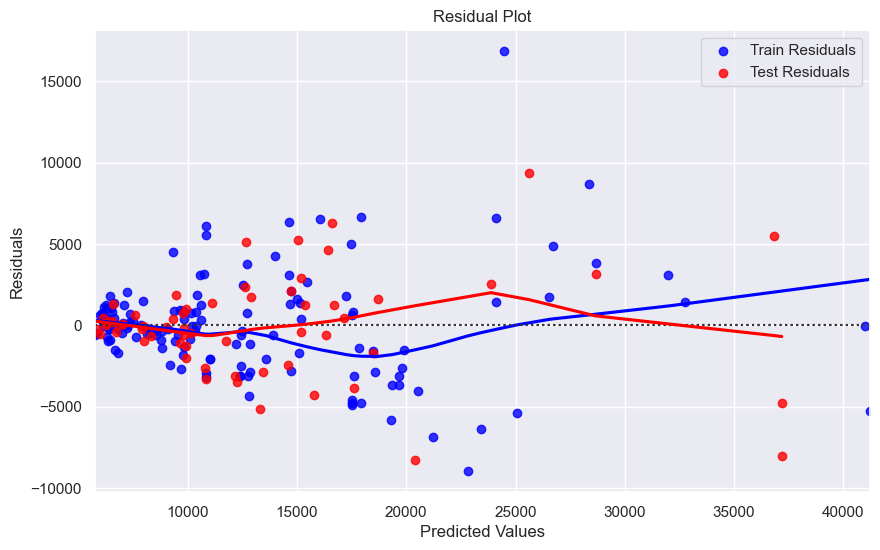

In [76]:
plt.figure(figsize=(10, 6))

# Residual plot for training data
sns.residplot(x=y_train_pred, y=train_residuals, lowess=True, label='Train Residuals', color='blue')

# Residual plot for test data
sns.residplot(x=y_test_pred, y=test_residuals, lowess=True, label='Test Residuals', color='red')

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Ridge Regression : Prevent Overfitting Especially when more independent Variables

In [77]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Initialize Ridge model
RidgeModel = Ridge()

# List to store R^2 values for different polynomial degrees and alpha values
Rsqu_test = []

# Polynomial degrees to iterate over
order = [1, 2, 3, 4]

# Ridge alpha values to iterate over
alphas = [0.1, 1, 10, 100]

# Iterate over polynomial degrees
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['Horsepower','Curb_Weight','engine_size','Highway_mpg']])
    x_test_pr = pr.transform(x_test[['Horsepower','Curb_Weight','engine_size','Highway_mpg']])
    
    # Iterate over alpha values for Ridge regression
    for alpha in alphas:
        RidgeModel.set_params(alpha=alpha)
        RidgeModel.fit(x_train_pr, y_train)
        yhat = RidgeModel.predict(x_test_pr)
        rsquared = r2_score(y_test, yhat)
        Rsqu_test.append((n, alpha, rsquared))

# Display the results
print("R^2 values for different polynomial degrees and alpha values:")
for result in Rsqu_test:
    print(f"Degree={result[0]}, Alpha={result[1]}, R^2={result[2]}")


R^2 values for different polynomial degrees and alpha values:
Degree=1, Alpha=0.1, R^2=0.8484743302909984
Degree=1, Alpha=1, R^2=0.8484748550110885
Degree=1, Alpha=10, R^2=0.8484800058810951
Degree=1, Alpha=100, R^2=0.8485226068700746
Degree=2, Alpha=0.1, R^2=0.8603188216342044
Degree=2, Alpha=1, R^2=0.8603785569626274
Degree=2, Alpha=10, R^2=0.8607399561017923
Degree=2, Alpha=100, R^2=0.8608598102182081
Degree=3, Alpha=0.1, R^2=0.602450473547477
Degree=3, Alpha=1, R^2=0.5900440583135752
Degree=3, Alpha=10, R^2=0.5908382028278399
Degree=3, Alpha=100, R^2=0.611133319297765
Degree=4, Alpha=0.1, R^2=-16.7424339055743
Degree=4, Alpha=1, R^2=-20.56819776046521
Degree=4, Alpha=10, R^2=-28.131029821782153
Degree=4, Alpha=100, R^2=-32.794722337235484


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.3028e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37255e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.3582e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.45966e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py